In [ ]:
pip install panda

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel File

In [3]:
#Reading the Dataset
xls = pd.ExcelFile("C:\Vijaya\Python\HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')


### 41.Find the age prone to get stroke.

In [ ]:
from datetime import datetime
## Reading ReAdmissionRegistry sheet
df_RE=pd.read_excel(xls, 'ReAdmissionRegistry')

## Reading Patients Sheet
df_PA=pd.read_excel(xls, 'Patients')

##  Created dataframe by selecting two columns from ReAdmissionRegistry sheet
df_new_re = df_RE[['PatientID','PrimaryDiagnosis']]

## Selecting patients with primaryDiagnosis=stroke
df_new_re= df_new_re[df_new_re['PrimaryDiagnosis']=='Stroke']

## Created dataframe by selecting two columns from patients sheet
df_new_pa= df_PA[['PatientID', 'DateOfBirth']]

## finding age using dateofbirth column
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')

## creating new dataframe with patientID and age
df_new_pa= df_new_pa[['PatientID', 'Age']]

## perform merge operation
merge_df= pd.merge(df_new_re,df_new_pa, on='PatientID')

 ## group by 
Result= merge_df.pivot_table(index=['Age'],values=['PatientID'],aggfunc='count')
# Alias the column
Result = Result.rename(columns={'PatientID': 'Count of Patients'})

print(Result)








### 42.Calculate mortality by diagnosis.

In [ ]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Mortality O:E = Observed Mortality/Expected Mortality

#Observed Mortality: COUNT of Discharge Disposition='Expired' 

#O:E Mortality: ([Observed Mortality])/SUM([Expected Mortality])
temp_df = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]
observed_Mortality = temp_df['DischargeDisposition'].value_counts()
expected_mortality = temp_df['ExpectedMortality'].sum()
Mortality = (observed_Mortality/expected_mortality)
#print(Mortality)
temp_df = temp_df[['Mortality','PrimaryDiagnosis']]
groupedDF = temp_df.groupby('PrimaryDiagnosis')
print(groupedDF)








### 43.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [1]:
df_PA[df_PA.FirstName.str.contains('lau', case=False) | df_PA.LastName.str.contains('lau', case=False)]

NameError: name 'df_PA' is not defined

### 44.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [ ]:
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')
#print(df_new_pa['Age'])
df_new_pa['Age'].sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_new_pa['Age'], .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_new_pa['Age'], .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_new_pa['Age'], .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_new_pa['Age'], 1.00, interpolation='midpoint'))




### 45.Usage of Enumeration in Python with any example.

In [ ]:
# Example list
fruits = ["apple", "banana", "cherry", "date"]

# Iterate over the list using enumeration
for index, value in enumerate(fruits):
    print(f"Index: {index}, Value: {value}")

### 46.Count of canceled status.

In [ ]:
#selecting all patients with Canceled status
df_new_AV = df_AV.loc[(df_AV['VisitStatus']=='Canceled') ]

print("%s%s" % ('Count Of Patients with ''Canceled'' status  : ',  len(df_new_AV.index)))

### 47.Display the patient details with maximum pulse pressure.

In [9]:

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
sorted_df = df_AV.sort_values(by=['Pulse'], ascending=False)

sorted_df.head(1)
## perform merge operation
#combined_df = pd.concat(sorted_df,df_PA , ignore_index=True)




TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### 48. Create a heat map to show the correlation between the column values of Edvisits.


In [23]:
#checking correlation
corr=df_EDV.corr()
print(corr)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


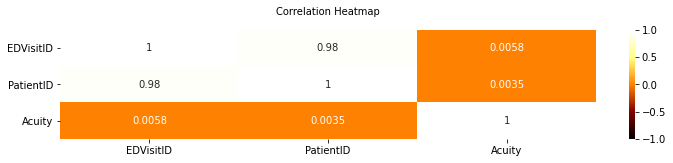

In [24]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_EDV.corr(), vmin=-1, vmax=1, annot=True, cmap="afmhot")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=15)

plt.show()

### 49.Plot a graph by counting the no. of patients in each department.

In [ ]:
# Create a countplot
sns.set(style="darkgrid")
sns.countplot(data =df_AV, x='VisitDepartmentID', palette="mako")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Number of Patients in Each Department")
plt.show()

### 50.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [ ]:
#selecting patient details with conditions
df_new_EDV=df_EDV.loc[((df_EDV['ReasonForVisit'] == 'Migraine') |  (df_EDV['ReasonForVisit'] == 'Pneumonia')) &  (df_EDV['Acuity']  >=2)]
#print(df_new_EDV)
## creating new dataframe with patientID and age
df_new_EDV= df_new_EDV[['PatientID','ReasonForVisit', 'Acuity' ]]
print(df_new_EDV)


### 51.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [ ]:
x = input("Enter the reason for visit: ")
print(x)

temp_df = df_EDV.loc[(df_EDV['ReasonForVisit'] == x) ]

print("%s%s" % ('Patients admitted with ' + x + ' are : ',  len(temp_df.index)))

### 52.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [ ]:
df_AV.loc[df_AV['BloodPressureSystolic'].idxmax()]

### 53.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

In [ ]:
line_1 = np.random.randint(low = 0, high = 50, size = 50)
line_2 = np.random.randint(low = -25, high = 100, size = 50)
line_3 =np.random.randint(low = 40, high = 100, size = 50)

fig, ax = plt.subplots()

ax.plot(line_1, color = 'Purple', label = 'Line 1')
ax.plot(line_2, color = 'Indigo', label = 'Line 2')
ax.plot(line_3, color = 'red', label = 'Line 2')

ax.legend(loc = 'upper left')
plt.show()

### 54.Retrieve the row with minimum DBP using sorting technique.

In [ ]:
sorted_df = df_AV.sort_values(by=['BloodPressureDiastolic'], ascending=True)

sorted_df.head(1)

### 55.Replace all the null values in ReadmissionFlag with 0.

In [ ]:
df_RE['ReadmissionFlag'] = df_RE['ReadmissionFlag'].fillna(0)
df_RE['ReadmissionFlag']

In [ ]:
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
sorted_df = df_AV.sort_values(by=['Pulse'], ascending=False)

sorted_df.head(1)

### 56.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [13]:
#selecting patientID column from ReadmissionRegistry sheet
df_new_RE = list(df_RE["PatientID"])
#checking list of patientID's which are not there in ReadmissionRegistry
df_PA[~df_PA['PatientID'].isin(df_new_RE)]
                    


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
134,135,Cally,Aylward,1962-01-13 00:11:17.581,Male,Black/African-American,English
144,145,Sheena,LLC,1966-10-17 13:24:21.621,Male,Black/African-American,English
188,189,Rempel,Group,1974-07-17 04:55:39.964,Male,Black/African-American,English
199,200,Fonz,Group,1964-01-15 01:57:57.966,Male,Black/African-American,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


### 59.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

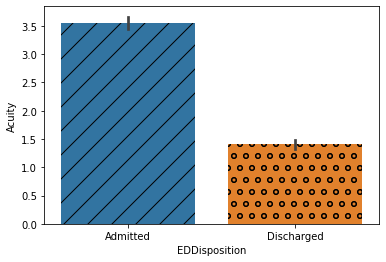

In [22]:
df_EDV.drop_duplicates()
a = sns.barplot(data=df_EDV, x= 'EDDisposition', y= 'Acuity' )

a.patches[0].set_hatch('/')  # Hatching pattern for the first bar
a.patches[1].set_hatch('o') # Hatching pattern for the second bar
plt.show()



### 60.Create a heat map on Readmission Registry table to find correlation between columns values.

In [25]:
#checking correlation
corr=df_RE.corr()
print(corr)

                           AdmissionID  PatientID  ExpectedLOS  \
AdmissionID                   1.000000   0.302079    -0.070080   
PatientID                     0.302079   1.000000    -0.015485   
ExpectedLOS                  -0.070080  -0.015485     1.000000   
ExpectedMortality             0.034083   0.008014     0.220725   
ReadmissionFlag                    NaN        NaN          NaN   
DaysToReadmission             0.049632   0.001710     0.010294   
EDVisitAfterDischargeFlag          NaN        NaN          NaN   

                           ExpectedMortality  ReadmissionFlag  \
AdmissionID                         0.034083              NaN   
PatientID                           0.008014              NaN   
ExpectedLOS                         0.220725              NaN   
ExpectedMortality                   1.000000              NaN   
ReadmissionFlag                          NaN              NaN   
DaysToReadmission                  -0.052563              NaN   
EDVisitAfterDisc

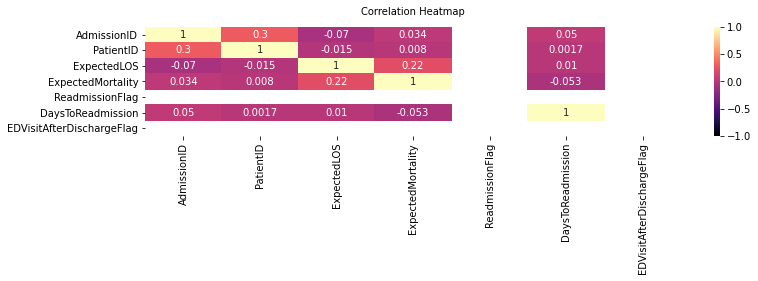

In [27]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_RE.corr(), vmin=-1, vmax=1, annot=True, cmap="magma")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

plt.show()